In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.pipeline import make_pipeline
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, LinearRegression, RidgeCV
from scipy.stats import norm

train = pd.read_csv('house-prices-advanced-regression-techniques\\train.csv', usecols=[1, 17, 18, 19, 43, 44, 46, 49, 50, 61, 62, 70, 77, 80])
test  = pd.read_csv('house-prices-advanced-regression-techniques\\test.csv', usecols=[1, 17, 18, 19, 43, 44, 46, 49, 50, 61, 62, 70, 77])

In [2]:
train = pd.get_dummies(train)

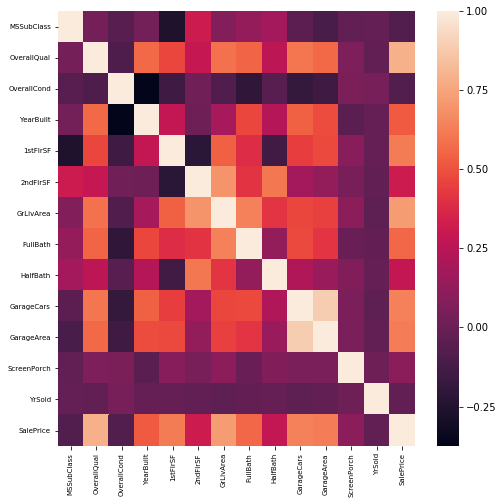

In [19]:
corr = train.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr)
plt.yticks(rotation=0, size=7)
plt.xticks(rotation=90, size=7)
plt.show()

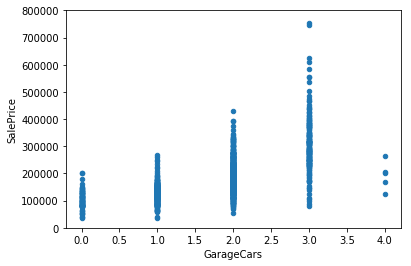

In [16]:
var = 'GarageCars'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

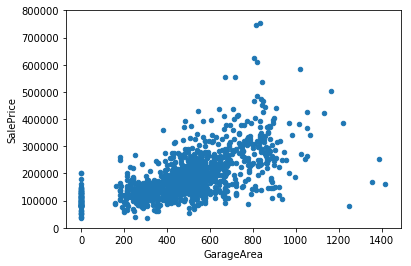

In [17]:
var1 = 'GarageArea'
data = pd.concat([train['SalePrice'], train[var1]], axis=1)
data.plot.scatter(x=var1, y='SalePrice', ylim=(0,800000));

In [24]:
train = train.drop(train[(train['GarageArea']>1000) & (train['SalePrice']<500000)].index)

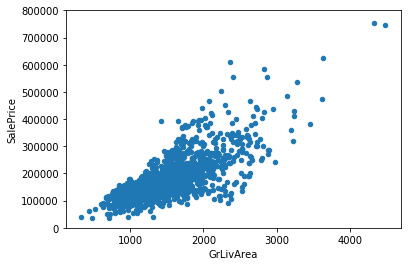

In [7]:
var2 = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var2]], axis=1)
data.plot.scatter(x=var2, y='SalePrice', ylim=(0,800000));

In [8]:
train = train.drop(train[(train['GrLivArea']>3000) & (train['SalePrice']<350000)].index)

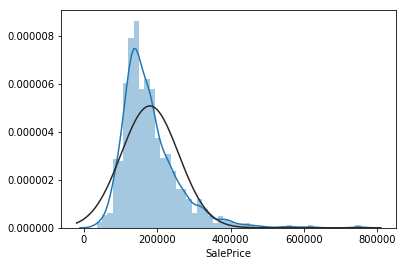

<Figure size 432x288 with 0 Axes>

In [20]:
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()

In [22]:
#log transformations 
#train['SalePrice'] = np.log(train['SalePrice'])

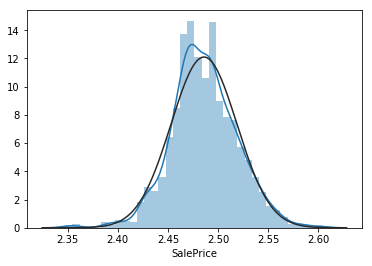

<Figure size 432x288 with 0 Axes>

In [24]:
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()

In [3]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=420)

#Root mean squared logarithmic error
def rmsle_cv(model):
    kf = KFold(n_splits=10, shuffle=True, random_state=420).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [4]:
X_train, y_train = train.loc[:, train.columns != 'SalePrice'], np.log(train['SalePrice'])

In [5]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
ridge = make_pipeline(RobustScaler(), RidgeCV(cv=kfolds))
rf=RandomForestRegressor()
lr=LinearRegression()
tree=DecisionTreeRegressor(random_state=1,max_depth=4)

In [6]:
ridge_score = rmsle_cv(ridge)
print("Ridge: ",ridge_score.mean(),ridge_score.std())

lasso_score = rmsle_cv(lasso)
print("Lasso: ",lasso_score.mean(), lasso_score.std())

elasticnet_score = rmsle_cv(ENet)
print("ENet: ",elasticnet_score.mean(), elasticnet_score.std())

KRR_score = rmsle_cv(KRR)
print("KRR: ",KRR_score.mean(), KRR_score.std())

GBoost_score = rmsle_cv(GBoost)
print("GBoost: ",GBoost_score.mean(), GBoost_score.std())

rf_score = rmsle_cv(rf)
print("Random Forest: ",rf_score.mean(), rf_score.std())

lr_score = rmsle_cv(lr)
print("Linear Regression: ",lr_score.mean(), lr_score.std())

tree_score = rmsle_cv(tree)
print("Decision Tree: ",tree_score.mean(), tree_score.std())

Ridge:  0.10269877537318231 0.015238497759156368
Lasso:  0.10247281042385145 0.01534463135828671
ENet:  0.10246878950260827 0.015347823347638703


C:\Users\btam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\btam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\btam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\btam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matr

KRR:  0.13613538565670585 0.043224241690917826
GBoost:  0.041166445192800646 0.012418959359058804


C:\Users\btam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\btam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\btam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\btam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

Random Forest:  0.009634261043760178 0.004887301130598855
Linear Regression:  0.10265203700975019 0.015154181285749801
Decision Tree:  0.040816495064000854 0.004803358729719218


In [7]:
lasso_model = lasso.fit(X_train,y_train)
ridge_model = ridge.fit(X_train,y_train)
elasticnet_model = ENet.fit(X_train,y_train)
KRR_model = KRR.fit(X_train,y_train)
GBoost_model = GBoost.fit(X_train,y_train)
randomforest_model = rf.fit(X_train,y_train)
lr_model = lr.fit(X_train,y_train)
tree_model =tree.fit(X_train,y_train)

C:\Users\btam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:165: LinAlgWarning: Ill-conditioned matrix (rcond=1.18636e-17): result may not be accurate.
  overwrite_a=False)
C:\Users\btam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [8]:
def blend_models(X):
    return (
        ((.1) * lasso_model.predict(X)) +
        ((.1) * ridge_model.predict(X)) +
        ((.1) * elasticnet_model.predict(X)) +
        ((.1) * KRR_model.predict(X)) +
        ((.6) * GBoost_model.predict(X))
           )

In [9]:
print(rmsle(y_train,blend_models(X_train)))

0.09812705920375839


In [10]:
X_train.shape

(1460, 13)

In [11]:
y_train.shape

(1460,)

In [13]:
test.fillna(train.mean(), inplace=True)
test['Prediction']=blend_models(test)

In [14]:
test.head()

,MSSubClass,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,GarageCars,GarageArea,ScreenPorch,YrSold,Prediction
0,20,5,6,1961,896,0,896,1,0,1.0,730.0,120,2010,11.805687
1,20,6,6,1958,1329,0,1329,1,1,1.0,312.0,0,2010,11.935765
2,60,5,5,1997,928,701,1629,2,1,2.0,482.0,0,2010,12.106545
3,60,6,6,1998,926,678,1604,2,1,2.0,470.0,0,2010,12.156344
4,120,8,5,1992,1280,0,1280,2,0,2.0,506.0,144,2010,12.188844


In [15]:
np.exp(test.Prediction)

0       134012.372817
1       152628.957085
2       181052.932021
3       190297.600088
4       196583.820186
5       176548.233265
6       178546.115122
7       171773.627824
8       187071.710309
9       112021.571975
10      187903.514558
11      101150.034891
12       95361.203277
13      151144.352959
14      136695.578327
15      390188.291515
16      270058.875407
17      324115.865298
18      286992.937535
19      436638.120451
20      319490.321381
21      212094.480695
22      182448.702615
23      169784.889525
24      172582.094879
25      209131.431035
26      359813.377773
27      261927.073940
28      206456.077994
29      205615.575075
            ...      
1429     77358.183406
1430    140603.627260
1431     65258.408574
1432    124515.901850
1433     59935.970574
1434    263869.681477
1435    267880.180520
1436    201903.721645
1437    161037.631931
1438    230279.768022
1439    161372.988897
1440    198433.602824
1441    177685.615696
1442    336911.028362
1443    32

In [16]:
output=pd.DataFrame({
    'Id':np.arange(1461,2920),
    'SalePrice':np.exp(test.Prediction)
})

In [17]:
output.to_csv('house-prices-advanced-regression-techniques\\bt_prediction17.csv',index=False)